In [13]:
#load up modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import pickle
import os

import category_encoders as ce

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm


import tensorflow as tf
from tensorflow import keras
from keras import layers

In [5]:
#Get dir
path="D:/Kuliah/Semester 5/PSD/psd-challenge/"
os.listdir(path)

def savefile(result, savename):
    try:
        pd.DataFrame(zip(range(1,len(result)+1),result), columns=["No", "UHH"]).to_csv(path+"Kerja lah su/"+savename+".csv", index=False)
    except:
        print("It only saves the result retard!")

In [10]:
#Get dataset                                #Gw baru nyadar train di split lagi?
test_data=pd.read_excel(path+"Test.xlsx")
train=pd.read_excel(path+"Train.xlsx")

In [70]:
train.corr().style.background_gradient(cmap='coolwarm')

,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,UHH
PSTV04,1.000000,0.137966,-0.130388,-0.220423,-0.216077,-0.016175,-0.015836,0.015929,0.016684,-0.018569,-0.018208,0.001501
PSTV05,0.137966,1.000000,0.252903,-0.003196,-0.131293,-0.022987,-0.022631,-0.047489,-0.049945,-0.022011,-0.021561,0.090454
PSTV06,-0.130388,0.252903,1.000000,-0.007117,-0.051664,-0.012813,-0.012999,-0.010351,-0.005545,-0.007761,-0.007727,0.234016
PSTV07,-0.220423,-0.003196,-0.007117,1.000000,0.038150,-0.058768,-0.059578,-0.124508,-0.129170,-0.055416,-0.056510,-0.149832
PSTV08,-0.216077,-0.131293,-0.051664,0.038150,1.000000,0.024646,0.024281,0.080477,0.073813,0.024077,0.023876,-0.402196
PSTV09,-0.016175,-0.022987,-0.012813,-0.058768,0.024646,1.000000,0.999879,-0.032531,0.028206,0.977436,0.977337,-0.016863
PSTV10,-0.015836,-0.022631,-0.012999,-0.059578,0.024281,0.999879,1.000000,-0.031730,0.028566,0.977170,0.977271,-0.015893
PSTV11,0.015929,-0.047489,-0.010351,-0.124508,0.080477,-0.032531,-0.031730,1.000000,0.895244,-0.032088,-0.030940,0.015067
PSTV12,0.016684,-0.049945,-0.005545,-0.129170,0.073813,0.028206,0.028566,0.895244,1.000000,0.029322,0.029954,0.018663
PSTV13,-0.018569,-0.022011,-0.007761,-0.055416,0.024077,0.977436,0.977170,-0.032088,0.029322,1.000000,0.999871,-0.018157


In [85]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [86]:
def rsq_plot(history):
  plt.plot(history.history['r2score'], label='r2score')
  plt.plot(history.history["val_r2score"], label='val_r2score')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('rsq')
  plt.legend()
  plt.grid(True)

In [87]:
def r2score(y_true, y_pred):
    SS_res =  keras.backend.sum(keras.backend.square( y_true-y_pred ))
    SS_tot = keras.backend.sum(keras.backend.square(y_true - keras.backend.mean(y_true)))
    return (1 - (SS_res/SS_tot))

In [88]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, kernel_initializer='normal', activation='relu'),
      layers.Dense(1, kernel_initializer='normal')
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(), metrics=r2score)
  return model

In [92]:
train_data, validation_data, train_value, validation_value= train_test_split(X, y, train_size=0.9)

normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_data))

dnn_model = build_and_compile_model(normalizer)

history=dnn_model.fit(train_data, train_value, verbose=1, validation_data=(validation_data, validation_value), epochs=100)

Epoch 1/100
240/240 [==============================] - 1s 4ms/step - loss: 60.5702 - r2score: -46.0073 - val_loss: 57.6931 - val_r2score: -38.2595
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 50.2302 - r2score: -32.2821 - val_loss: 41.8648 - val_r2score: -21.1997
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 31.3990 - r2score: -14.4930 - val_loss: 24.3551 - val_r2score: -8.4123
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 20.8247 - r2score: -6.6856 - val_loss: 18.5911 - val_r2score: -4.7071
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 16.2173 - r2score: -3.6642 - val_loss: 14.2101 - val_r2score: -2.5444
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 12.5914 - r2score: -1.9427 - val_loss: 11.3986 - val_r2score: -1.3561
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 10.3576 - r2score: -1.0593 - val_loss: 9.8627 - va

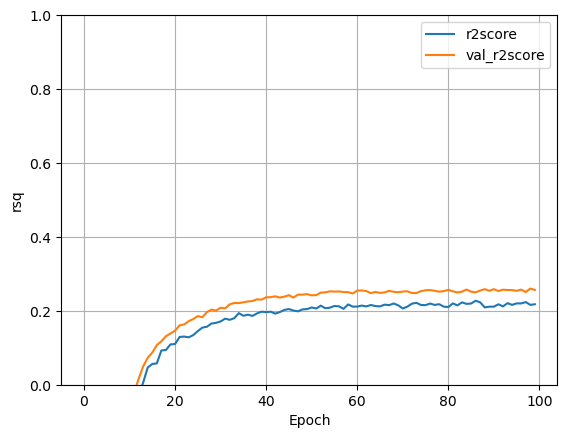

In [94]:
rsq_plot(history)